## MAKİNE ÖĞRENMESİNE GİRİŞ

YÖNTEMLER

Holout yöntemi
k-katlı çapraz doğrulama yöntemi
leave onu out
Bootstrap


## Basit Doğrusal Regresyon

In [1]:
import pandas as pd
ad = pd.read_csv("/Users/mehmetsenel/Desktop/MakineÖğrenmesi/Advertising.csv")
df = ad.copy()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/mehmetsenel/Desktop/MakineÖğrenmesi/Advertising.csv'

In [ ]:
df = df.iloc[:,1:len(df)]

In [ ]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


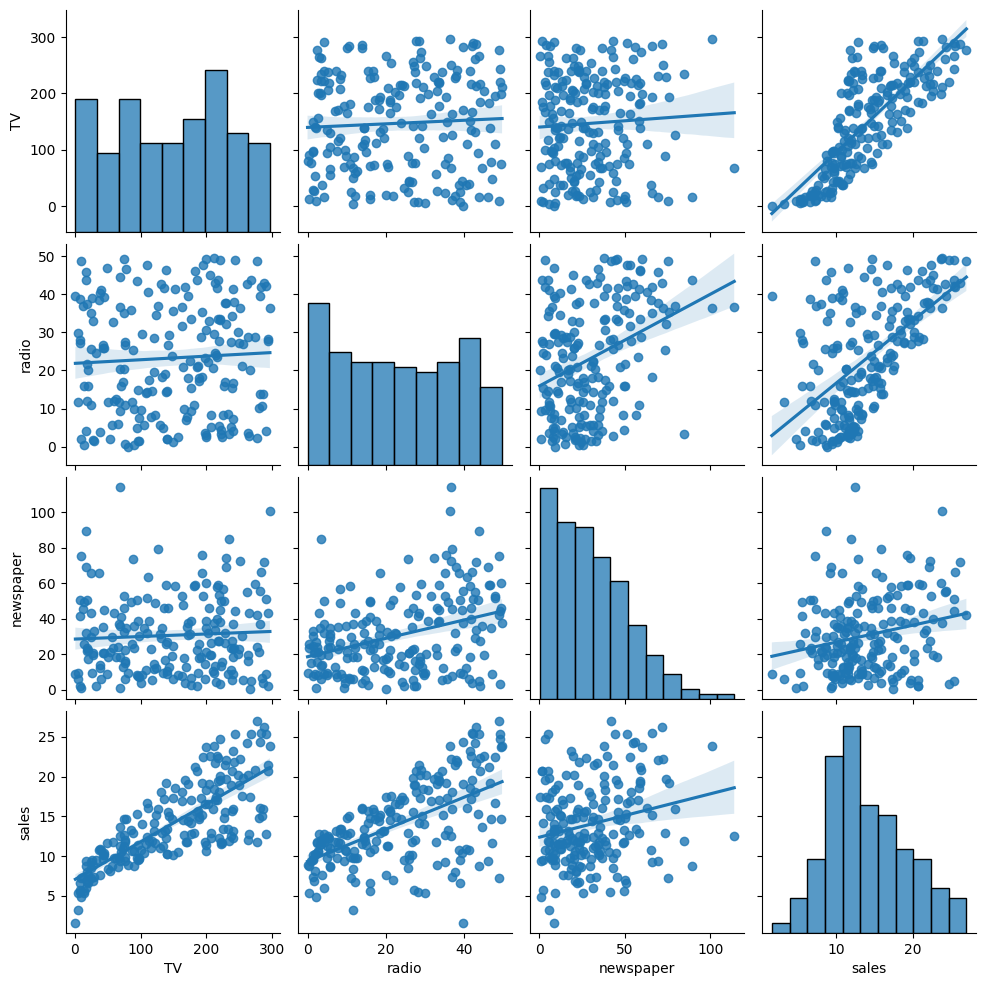

In [ ]:
import seaborn as sns
sns.pairplot(df,kind="reg")

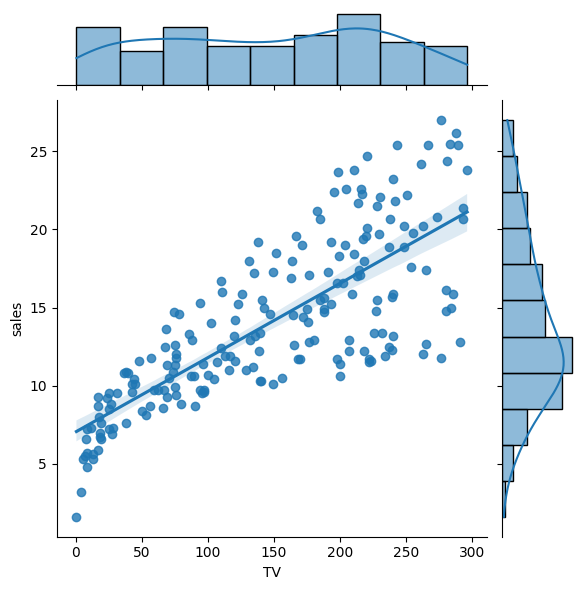

In [ ]:
sns.jointplot(x= "TV",y="sales", data=df,kind="reg")

In [ ]:
import statsmodels.api as sm
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [ ]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [ ]:
X = sm.add_constant(X)

In [ ]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [ ]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
lm = sm.OLS(y,X)

In [ ]:
model = lm.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        15:49:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.formula.api as smf
lm = smf.ols("sales ~ TV", df)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 09 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        15:49:55   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [ ]:
model.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [ ]:
model.f_pvalue

1.467389700194626e-42

In [ ]:
print("f_pvalue:","%.4f"% model.f_pvalue)


f_pvalue: 0.0000


In [ ]:
print("tvalue:","%.2f"%model.tvalues[0:1])

tvalue: 15.36


/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_17947/116653335.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("tvalue:","%.2f"%model.tvalues[0:1])


In [ ]:
model.mse_model
##modelin başarısını(kareler ortalaması) gösterir

3314.6181668686495

In [ ]:
model.rsquared_adj
##r-spuared değerini gösterir

0.6099148238341625

In [ ]:
model.fittedvalues[0:5]
##tahmin edilen değerlere ulaşmamızı sağlar

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [ ]:
y[0:5]
##gerçek y değerlerini gösterir

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [ ]:
print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


/var/folders/5f/h_sq9qfs1593m5tqmzlkhynm0000gn/T/ipykernel_17947/3941244673.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("Sales = " + str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))


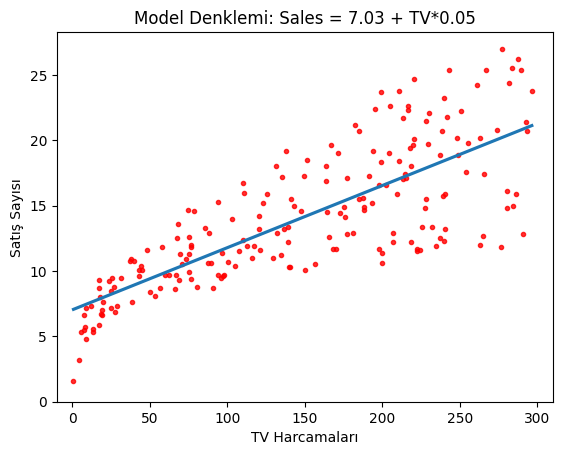

In [ ]:
g = sns.regplot(x=df["TV"],y=df["sales"], ci=None,scatter_kws={'color':'r','s':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)
model.intercept_
model.coef_

array([[0.04753664]])

In [ ]:
model.score(X,y)

0.611875050850071

In [ ]:
model.predict(X)[0:10]

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

Tahmin

In [ ]:
7.03 + 30*0.04

8.23

In [ ]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X,y)

In [ ]:
model.predict([[30]])
##tahmin 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [ ]:
yeni_veri = [[5],[90],[200]]

In [ ]:
model.predict(yeni_veri)
##çoklu tahmin

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 7.27027675, 11.31089119, 16.53992164])

##artıklar ve makine öğrenmesindeki önemi

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
lm = smf.ols("sales ~ TV",df)
model = lm.fit()

In [ ]:
mse = mean_squared_error(y,model.fittedvalues)

In [ ]:
mse

10.512652915656757

In [ ]:
import numpy as np
rmse = np.sqrt(mse)

In [ ]:
rmse

3.2423221486546887

In [ ]:
reg.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

In [ ]:
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [ ]:
##arr = np.array({ "gercek_y " : y[0:10],"tahmin_y" : reg.predict(X)[0:10]})


In [ ]:
arr

array({'gercek_y ':    sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9
5    7.2
6   11.8
7   13.2
8    4.8
9   10.6, 'tahmin_y': array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])}, dtype=object)

In [ ]:
k_t = pd.DataFrame({"gercek_y" : y[0:10],
                    "tahmin_y" : reg.predict(X)[0:10]})

In [ ]:
k_t

,gercek_y,tahmin_y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [ ]:
k_t["hata"] = k_t["gercek_y"] - k_t["tahmin_y"]

In [ ]:
k_t

,gercek_y,tahmin_y,hata
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [ ]:
k_t["hata_kare"] = k_t["hata"]**2

In [ ]:
k_t

,gercek_y,tahmin_y,hata,hata_kare
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [ ]:
np.sum(k_t["hata_kare"])

92.90350329638102

In [ ]:
np.mean(k_t["hata_kare"])

9.290350329638102

In [ ]:
np.sqrt(np.mean(k_t["hata_kare"]))

3.048007599996775

In [ ]:
model.resid[0:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

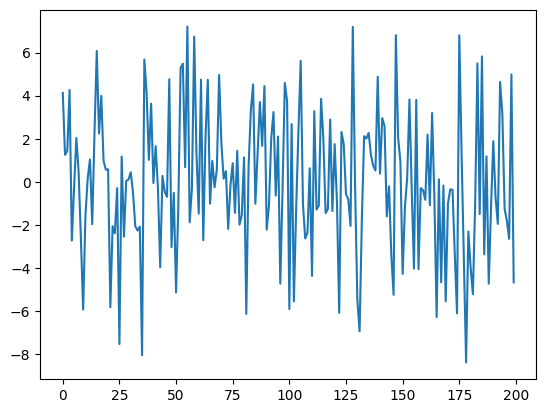

In [ ]:
plt.plot(model.resid)